In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import OPTICS

# Generate a mixed signal with known frequencies
freqs=[1/20,1/80]
time=np.arange(2001)
signals=[]
for freq in freqs:
    signals.append(np.cos(2*np.pi*freq*time))
signal=sum(signals)
    
# Add outliers

outliers_start = np.mean(signal)+5*np.std(signal)
outliers_end = np.mean(signal)+7*np.std(signal)
outlier_values = np.arange(outliers_start,outliers_end,0.1)
index = np.random.randint(0,len(signal),6)


signal_out = signal
for i,ind in enumerate(index):
    signal_out[ind] = outlier_values[i]



In [67]:
print('Outliers indices are',index)

Outliers indices are [ 412  286  694  749 1633  631]


In [68]:
signal_out

array([2.        , 1.94797385, 1.79670533, ..., 1.79670533, 1.94797385,
       2.        ])

In [78]:
nn = NearestNeighbors(4)



In [79]:
nbrs =nn.fit(signal_out.reshape(-1,1))

In [80]:
distances, indices = nbrs.kneighbors(signal_out.reshape(-1,1))

In [81]:
distances

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16],
       [0.00000000e+00, 2.22044605e-16, 4.44089210e-16, 4.44089210e-16],
       ...,
       [0.00000000e+00, 2.44249065e-15, 5.10702591e-15, 5.99520433e-15],
       [0.00000000e+00, 4.44089210e-16, 8.88178420e-16, 1.33226763e-15],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [82]:
indices

array([[1520, 1760,  400,  480],
       [   1,  161,  959, 1201],
       [   2,  322,   82,  242],
       ...,
       [1998, 1678,  962, 1122],
       [1999,  481,  561, 1679],
       [1520, 1760,  400,  480]])

In [83]:
distances = distances[:,-1]

In [84]:
distances = sorted(distances,reverse=True)

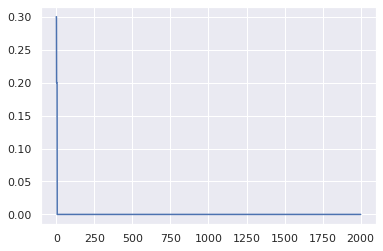

In [85]:
plt.plot(distances)

In [106]:
m = DBSCAN(eps=0.01, min_samples=4)
m.fit(signal_out.reshape(-1,1))

DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [107]:
np.where(m.labels_==-1)# detects the indices of outliers

(array([ 286,  412,  631,  694,  749, 1633]),)